# Okavango GCM Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import glob
import itertools
from matplotlib.patches import Rectangle
import matplotlib.transforms as transforms
import seaborn as sns
# from matplotlib.dates import date2num
import matplotlib.dates as mdates
# from hydroeval import evaluator, nse, rmse, pbias

In [2]:
from swatmf_pkgs import gcm_analysis

# Set Path

In [3]:
working_path = "D:\\Projects\\Watersheds\\Okavango\\scenarios\\okvg_swatmf_scn_climates\\weather_inputs"
base = "D:\\Projects\\Watersheds\\Okavango\\scenarios\\okvg_swatmf_scn_climates\\models\\base\\pcp1.pcp"

# Rainfall Data

In [4]:
wt_fds, full_paths = gcm_analysis.get_weather_folder_lists(working_path)


In [5]:
full_paths[0]

'D:\\Projects\\Watersheds\\Okavango\\scenarios\\okvg_swatmf_scn_climates\\weather_inputs\\ssp245-inm-cm5-0'

In [6]:
wt_fds[0]

'ssp245-inm-cm5-0'

In [7]:

os.chdir(full_paths[0])
inf = [f for f in glob.glob("*.csv")][0]
df = gcm_analysis.read_gcm(os.path.join(full_paths[0], inf), [x for x in range(1, 258)])
# df = df.mean(axis=1) # whole watershed

In [61]:
df

sub_1  sub_2  sub_3  sub_4  sub_5  sub_6  sub_7  sub_8  sub_9  \
1980-01-01   8.71   7.37   7.63   5.96   5.24   2.36   5.87   1.48   0.99   
1980-01-02   3.84   3.30   3.46   2.63   2.17   1.43   2.41   1.54   1.51   
1980-01-03   9.69   7.86   8.56   8.54   7.68   9.31   7.38   8.30   8.21   
1980-01-04  12.47  11.88  12.13  11.37  10.79   8.93  11.40   8.06   6.83   
1980-01-05  13.51  13.36  13.27  12.50  12.11   6.96  12.43   6.31   8.01   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2099-12-27   5.38   6.92   6.17   6.41   6.83   6.87   7.03   7.10   8.06   
2099-12-28   4.91   6.68   5.66   5.16   5.83   4.78   6.52   5.36   5.29   
2099-12-29  12.88  11.84  12.87  13.56  13.42  17.75  12.64  17.70  16.20   
2099-12-30  17.60  17.96  17.54  19.27  19.94  24.81  19.17  24.06  24.68   
2099-12-31  15.61  16.43  15.97  17.14  17.10  19.31  17.47  19.31  19.18   

            sub_10  ...  sub_248  sub_249  sub_250  sub_251  sub_252  sub_253  \
1980-01-01    0.22  ...     0.14     0.17     0.00     0.08     0.00     0.00   
1980-01-02    1.28  ...     0.20     0.00     0.54     0.00     0.00     0.00   
1980-01-03    7.14  ...     2.48     1.42     0.00     0.84     0.18     0.00   
1980-01-04    6.18  ...     0.38     0.95     0.00     1.73     1.54     0.45   
1980-01-05    7.50  ...     0.00     0.00     0.00     0.00     0.00     0.00   
...            ...  ...      ...      ...      ...      ...      ...      ...   
2099-12-27    8.37  ...     5.69     6.32     9.12     7.78     9.50     9.55   
2099-12-28    6.08  ...     0.98     1.48     3.56     2.38     4.21     6.13   
2099-12-29   16.40  ...     0.00     0.00     0.00     0.00     0.00     0.00   
2099-12-30   23.31  ...     0.37     0.64     0.00     0.71     0.44     0.05   
2099-12-31   19.85  ...     0.00     0.00     0.00     0.00     0.00     0.00   

            sub_254  sub_255  sub_256  sub_257  
1980-01-01     0.00     0.00     0.00     0.00  
1980-01-02     0.82     0.19     0.42     1.07  
1980-01-03     0.00     0.94     2.64     0.21  
1980-01-04     0.00     0.00     0.00     0.00  
1980-01-05     0.00     0.00     0.00     0.00  
...             ...      ...      ...      ...  
2099-12-27     7.57     4.40     1.95     3.00  
2099-12-28     7.52     5.97     4.33     5.77  
2099-12-29     0.00     0.00     0.00     0.00  
2099-12-30     0.00     0.06     0.00     0.00  
2099-12-31     0.00     0.00     0.00     0.00  

[43830 rows x 257 columns]

In [126]:
wt_fds, full_paths = gcm_analysis.get_weather_folder_lists(working_path)
tot_df = pd.DataFrame()
for n, p in zip(wt_fds, full_paths):
    os.chdir(p)
    inf = [f for f in glob.glob("*.csv")][0]
    df = gcm_analysis.read_gcm(os.path.join(p, inf), [x for x in range(1, 258)])

    for i in df.columns:
        dff = df[i].loc[df[i] >=1000]
        dff.name = 'rainfall'
        dff = dff.to_frame()
        dff['sub_no'] = i
        dff['model_name'] = n
        tot_df = pd.concat([tot_df, dff], axis=0)
tot_df['date'] = tot_df.index
# tot_df.reset_index(drop=False)
# tot_df = tot_df.set_index('model_name')
# tot_df['model_name'] =  tot_df
tot_df = tot_df.sort_values(by=['model_name', 'date'])




In [128]:
tot_df

rainfall   sub_no          model_name       date
2018-07-15   3877.72  sub_114    ssp245-inm-cm5-0 2018-07-15
2032-07-15   1771.54   sub_99    ssp245-inm-cm5-0 2032-07-15
2051-02-09   1897.61  sub_152       ssp245-miroc6 2051-02-09
2092-07-22   1419.19  sub_193       ssp245-miroc6 2092-07-22
2098-05-30   3739.74  sub_142       ssp245-miroc6 2098-05-30
2051-09-16   5292.86   sub_83   ssp245-noresm2-lm 2051-09-16
2055-08-08   6365.70  sub_197   ssp245-noresm2-lm 2055-08-08
2057-08-14   5859.41  sub_197   ssp245-noresm2-lm 2057-08-14
2058-07-13   1246.81   sub_81   ssp245-noresm2-lm 2058-07-13
2064-09-12   2215.56  sub_235   ssp245-noresm2-lm 2064-09-12
2066-07-04   1388.04   sub_66   ssp245-noresm2-lm 2066-07-04
2073-06-17   1017.19  sub_252   ssp245-noresm2-lm 2073-06-17
2077-11-21   2610.97  sub_176   ssp245-noresm2-lm 2077-11-21
2096-10-15   8340.71  sub_220   ssp245-noresm2-lm 2096-10-15
2046-07-08   1141.86   sub_91  ssp245-ukesm1-0-ll 2046-07-08
2051-07-11   1640.27   sub_91  ssp245-ukesm1-0-ll 2051-07-11
2071-06-09   1132.57   sub_76  ssp245-ukesm1-0-ll 2071-06-09
2021-08-11   3705.64  sub_216    ssp585-inm-cm5-0 2021-08-11
2060-06-28   3913.36   sub_33    ssp585-inm-cm5-0 2060-06-28
2094-07-12   2333.00   sub_26    ssp585-inm-cm5-0 2094-07-12
2096-02-20   2866.26  sub_245    ssp585-inm-cm5-0 2096-02-20
2025-08-03   2212.42   sub_22       ssp585-miroc6 2025-08-03
2047-09-16   5984.12  sub_257       ssp585-miroc6 2047-09-16
2072-07-23   1651.66  sub_254       ssp585-miroc6 2072-07-23
2079-05-26   4204.04  sub_142       ssp585-miroc6 2079-05-26
2080-08-22  26841.70   sub_18       ssp585-miroc6 2080-08-22
2081-04-12   1476.19  sub_149       ssp585-miroc6 2081-04-12
2081-05-25  19677.50  sub_224       ssp585-miroc6 2081-05-25
2082-10-26   1519.06  sub_169       ssp585-miroc6 2082-10-26
2094-09-01   8045.47  sub_142       ssp585-miroc6 2094-09-01
2095-05-10   1237.23  sub_170       ssp585-miroc6 2095-05-10
2050-06-20  14145.00  sub_220   ssp585-noresm2-lm 2050-06-20
2080-11-01   5087.99  sub_220   ssp585-noresm2-lm 2080-11-01
2086-06-04   1906.27  sub_233   ssp585-noresm2-lm 2086-06-04
2092-08-15   1516.28  sub_121   ssp585-noresm2-lm 2092-08-15
2094-10-04   3581.28  sub_220   ssp585-noresm2-lm 2094-10-04
2054-12-17   1053.95   sub_37  ssp585-ukesm1-0-ll 2054-12-17
2081-03-28   1055.89   sub_27  ssp585-ukesm1-0-ll 2081-03-28
2096-02-04   9442.68   sub_27  ssp585-ukesm1-0-ll 2096-02-04

In [147]:
len(tot_df)

39

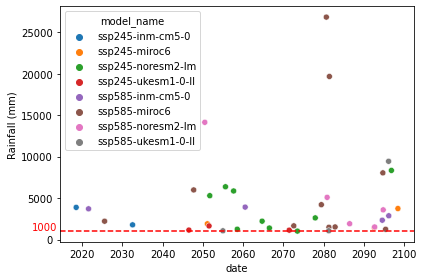

In [148]:
f, ax = plt.subplots()
# ax.scatter(tot_df.index, tot_df.rainfall)
sns.scatterplot(x='date', y='rainfall', hue='model_name', data=tot_df)
ax.axhline(y=1000, color='r', linestyle='--')
ax.set_ylabel('Rainfall (mm)')
ax.text(-0.08, 0.05, '1000', color='r', transform=ax.transAxes)
f.tight_layout()
plt.savefig(os.path.join(working_path, 'outlier.jpg'), dpi=300, bbox_inches="tight")
plt.show()

In [123]:

tot_df.to_csv(os.path.join(working_path, 'outliers.csv'), index=False)

In [113]:
tot_df

date  rainfall   sub_no
model_name                                      
ssp245-inm-cm5-0   2032-07-15   1771.54   sub_99
ssp245-inm-cm5-0   2018-07-15   3877.72  sub_114
ssp245-miroc6      2098-05-30   3739.74  sub_142
ssp245-miroc6      2051-02-09   1897.61  sub_152
ssp245-miroc6      2092-07-22   1419.19  sub_193
ssp245-noresm2-lm  2066-07-04   1388.04   sub_66
ssp245-noresm2-lm  2058-07-13   1246.81   sub_81
ssp245-noresm2-lm  2051-09-16   5292.86   sub_83
ssp245-noresm2-lm  2077-11-21   2610.97  sub_176
ssp245-noresm2-lm  2055-08-08   6365.70  sub_197
ssp245-noresm2-lm  2057-08-14   5859.41  sub_197
ssp245-noresm2-lm  2096-10-15   8340.71  sub_220
ssp245-noresm2-lm  2064-09-12   2215.56  sub_235
ssp245-noresm2-lm  2073-06-17   1017.19  sub_252
ssp245-ukesm1-0-ll 2071-06-09   1132.57   sub_76
ssp245-ukesm1-0-ll 2046-07-08   1141.86   sub_91
ssp245-ukesm1-0-ll 2051-07-11   1640.27   sub_91
ssp585-inm-cm5-0   2094-07-12   2333.00   sub_26
ssp585-inm-cm5-0   2060-06-28   3913.36   sub_33
ssp585-inm-cm5-0   2021-08-11   3705.64  sub_216
ssp585-inm-cm5-0   2096-02-20   2866.26  sub_245
ssp585-miroc6      2080-08-22  26841.70   sub_18
ssp585-miroc6      2025-08-03   2212.42   sub_22
ssp585-miroc6      2079-05-26   4204.04  sub_142
ssp585-miroc6      2094-09-01   8045.47  sub_142
ssp585-miroc6      2081-04-12   1476.19  sub_149
ssp585-miroc6      2082-10-26   1519.06  sub_169
ssp585-miroc6      2095-05-10   1237.23  sub_170
ssp585-miroc6      2081-05-25  19677.50  sub_224
ssp585-miroc6      2072-07-23   1651.66  sub_254
ssp585-miroc6      2047-09-16   5984.12  sub_257
ssp585-noresm2-lm  2092-08-15   1516.28  sub_121
ssp585-noresm2-lm  2050-06-20  14145.00  sub_220
ssp585-noresm2-lm  2080-11-01   5087.99  sub_220
ssp585-noresm2-lm  2094-10-04   3581.28  sub_220
ssp585-noresm2-lm  2086-06-04   1906.27  sub_233
ssp585-ukesm1-0-ll 2081-03-28   1055.89   sub_27
ssp585-ukesm1-0-ll 2096-02-04   9442.68   sub_27
ssp585-ukesm1-0-ll 2054-12-17   1053.95   sub_37

In [99]:
base_df = gcm_analysis.read_pcp(base, 257)

100%|██████████| 257/257 [00:03<00:00, 71.26it/s]


In [100]:
base_df

sub_1  sub_2  sub_3  sub_4  sub_5  sub_6  sub_7  sub_8  sub_9  \
1960-01-01    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1960-01-02    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1960-01-03    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1960-01-04   20.4   26.5   21.6   17.4   18.1    1.9   23.1    0.0    3.1   
1960-01-05   20.6   21.3   21.7   21.6   25.0   38.9   25.4   31.2   33.6   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2019-12-27   18.2   17.0   16.6   16.0   14.1    9.3   16.0    7.1    9.2   
2019-12-28    0.0   11.0    2.6    0.0    1.6    6.2    5.8    5.5    5.8   
2019-12-29   17.2   14.2   16.8   22.2   17.8   17.2   12.1   17.6   14.0   
2019-12-30    0.0    0.0    0.0    0.0    0.0    0.5    0.0    1.1    2.7   
2019-12-31    6.9    2.4    5.6    6.1    5.8    9.0    4.3   11.3    8.5   

            sub_10  ...  sub_248  sub_249  sub_250  sub_251  sub_252  sub_253  \
1960-01-01     0.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
1960-01-02     0.0  ...      0.0      0.0      0.0      0.0      1.8      2.3   
1960-01-03     0.0  ...      1.1      0.0      1.5      3.0      0.0      0.0   
1960-01-04     0.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
1960-01-05    33.4  ...      0.0      0.0      0.0      0.0      0.0      0.0   
...            ...  ...      ...      ...      ...      ...      ...      ...   
2019-12-27     9.8  ...      4.8      4.4      1.3      1.0      1.6      2.7   
2019-12-28     6.1  ...      0.1      0.0      0.6      0.0      1.1      2.3   
2019-12-29    10.6  ...      0.0      4.4      2.9      6.4      7.3      7.6   
2019-12-30     3.0  ...      8.7      4.7      8.7      5.4      5.9     10.2   
2019-12-31    10.9  ...      4.8      3.7      7.1      4.1      8.7      8.2   

            sub_254  sub_255  sub_256  sub_257  
1960-01-01      5.1      1.6      1.9      2.3  
1960-01-02      0.0      2.6      1.2      0.0  
1960-01-03      0.0      3.9      3.3      4.7  
1960-01-04      0.0      4.1      4.3      5.5  
1960-01-05      0.0      4.1      4.3      5.5  
...             ...      ...      ...      ...  
2019-12-27      0.8      0.0      0.0      0.0  
2019-12-28      2.4      9.4     10.0      8.0  
2019-12-29     12.8      6.9      4.5      5.2  
2019-12-30     10.1      6.7      6.5      4.7  
2019-12-31      5.1      4.6      2.6      2.7  

[21915 rows x 257 columns]

In [102]:
base_df.max().max()

147.8

In [20]:

# base_dfm = base_df.mean(axis=1) # whole watershed
base_dfm = base_df['sub_240']
base_dfm.name ='base'
base_dfm

1960-01-01    0.0
1960-01-02    0.0
1960-01-03    0.0
1960-01-04    3.3
1960-01-05    0.0
             ... 
2019-12-27    0.6
2019-12-28    6.0
2019-12-29    2.5
2019-12-30    1.2
2019-12-31    9.3
Name: base, Length: 21915, dtype: float64

In [21]:
base_dfm = base_dfm['1/1/1980':'12/31/2019']
as_base =  base_dfm.resample('A').sum()
ms_base = base_dfm.resample('M').sum()

In [22]:
as_base.name ='base'
ms_base.name ='base'

In [23]:
dff = pd.DataFrame()
for i, name in zip(full_paths, wt_fds):
    df = gcm_analysis.read_pcp(os.path.join(i, 'pcp1.pcp'), 257)
    # df = df.mean(axis=1) # whole watershed
    df = df['sub_240']
    df.name = name
    dff = pd.concat([dff, df], axis=1)



100%|██████████| 257/257 [00:06<00:00, 37.12it/s]


In [24]:
dff

ssp245-inm-cm5-0  ssp245-miroc6  ssp245-noresm2-lm  \
1980-01-01               0.2            0.0               11.5   
1980-01-02               0.0            0.0               11.5   
1980-01-03               0.0            0.0               18.8   
1980-01-04               1.9            0.0               10.1   
1980-01-05               1.2            0.8                8.2   
...                      ...            ...                ...   
2099-12-27               8.4            1.4                6.5   
2099-12-28               7.0            7.9                9.8   
2099-12-29               3.4           10.5                0.2   
2099-12-30               3.0            6.1                0.0   
2099-12-31               1.8            0.0                0.0   

            ssp245-ukesm1-0-ll  ssp585-inm-cm5-0  ssp585-miroc6  \
1980-01-01                 0.0               0.2            0.0   
1980-01-02                 0.0               0.0            0.0   
1980-01-03                 0.0               0.0            0.0   
1980-01-04                 0.0               1.9            0.0   
1980-01-05                 1.3               1.2            0.8   
...                        ...               ...            ...   
2099-12-27                 5.6              11.2            1.1   
2099-12-28                 5.6               2.7            0.0   
2099-12-29                 7.7               6.4            0.0   
2099-12-30                 0.1               9.1            1.8   
2099-12-31                 0.1               5.3            0.0   

            ssp585-noresm2-lm  ssp585-ukesm1-0-ll  
1980-01-01               11.5                 0.0  
1980-01-02               11.5                 0.0  
1980-01-03               18.8                 0.1  
1980-01-04               10.1                 0.0  
1980-01-05                8.2                 1.3  
...                       ...                 ...  
2099-12-27                1.5                 0.0  
2099-12-28                3.8                 0.0  
2099-12-29                0.1                 0.0  
2099-12-30                0.6                 3.5  
2099-12-31                2.3                 0.0  

[43830 rows x 8 columns]

In [25]:
dff.index = pd.DatetimeIndex(dff.index).normalize()

            ssp245-inm-cm5-0  ssp245-miroc6  ssp245-noresm2-lm  \
2001-02-22              78.5            0.1               10.6   
2018-07-15            1000.0            0.0                0.0   
2034-02-21              59.2           17.3                0.0   
2059-01-02              57.3            2.2                0.0   
2059-04-04              56.8            0.0                0.0   
2070-01-11              52.0            0.0                3.1   
2076-01-16              77.8           12.6                1.5   
2087-04-12              53.9            8.0                0.0   
2087-04-13              51.9           19.1                0.0   
2093-04-01              56.7            0.0                0.0   

            ssp245-ukesm1-0-ll  ssp585-inm-cm5-0  ssp585-miroc6  \
2001-02-22                 6.0              78.5            0.1   
2018-07-15                 0.0               0.1            0.0   
2034-02-21                 1.0               3.9            0.4   
2059-

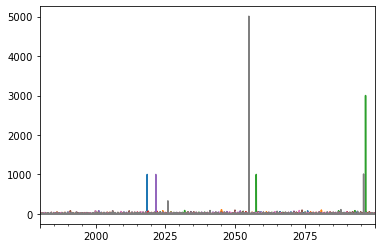

In [62]:
for i in dff.columns:
    print(dff.loc[dff[i]>50])
    dff[i].plot()

In [59]:
dff.idxmax()

ssp245-inm-cm5-0     2018-07-15
ssp245-miroc6        2045-02-28
ssp245-noresm2-lm    2096-10-15
ssp245-ukesm1-0-ll   2074-01-31
ssp585-inm-cm5-0     2021-08-11
ssp585-miroc6        2049-12-26
ssp585-noresm2-lm    2054-12-19
ssp585-ukesm1-0-ll   2054-12-17
dtype: datetime64[ns]

In [56]:
dff.loc['07/15/2018']

ssp245-inm-cm5-0      1000.0
ssp245-miroc6            0.0
ssp245-noresm2-lm        0.0
ssp245-ukesm1-0-ll       0.0
ssp585-inm-cm5-0         0.1
ssp585-miroc6            0.0
ssp585-noresm2-lm        0.0
ssp585-ukesm1-0-ll       0.0
Name: 2018-07-15 00:00:00, dtype: float64

In [26]:
asscn = dff.resample('A').sum()
msscn = dff.resample('M').sum()


In [13]:
asdf = pd.concat([as_base, asscn], axis=1)
asdf

base  ssp245-inm-cm5-0  ssp245-miroc6  ssp245-noresm2-lm  \
1980-12-31  597.686770        767.810117     886.250584        1154.253307   
1981-12-31  599.377432        767.602724     647.794942        1066.924125   
1982-12-31  866.950584        761.400778     769.044747         659.406615   
1983-12-31  720.656420       1021.252140     886.783658         628.296887   
1984-12-31  781.801167        682.348249     675.867315         632.136187   
...                ...               ...            ...                ...   
2095-12-31         NaN        999.558366    1038.885992         699.183658   
2096-12-31         NaN        646.735019     844.181712         907.900389   
2097-12-31         NaN        641.250973     829.448638         714.363424   
2098-12-31         NaN        894.877043    1217.382101         618.162257   
2099-12-31         NaN        759.029572     968.282879         922.923346   

            ssp245-ukesm1-0-ll  ssp585-inm-cm5-0  ssp585-miroc6  \
1980-12-31          793.672763        767.822568     886.256031   
1981-12-31          578.255253        767.606615     647.793774   
1982-12-31          737.215564        761.515564     769.039689   
1983-12-31          712.282490       1021.257977     886.779767   
1984-12-31          889.912062        682.454086     675.881712   
...                        ...               ...            ...   
2095-12-31          376.142802        685.667315     946.641245   
2096-12-31          639.184047        832.950195     770.366148   
2097-12-31          894.415175        736.933463     983.658755   
2098-12-31          756.612451        689.802335     913.049805   
2099-12-31          762.428405        726.692996     813.983268   

            ssp585-noresm2-lm  ssp585-ukesm1-0-ll  
1980-12-31        1154.333852          793.670039  
1981-12-31        1066.609728          578.128794  
1982-12-31         659.449805          737.149416  
1983-12-31         628.308171          712.285992  
1984-12-31         632.163035          889.923346  
...                       ...                 ...  
2095-12-31         330.617510          856.455642  
2096-12-31         489.970428         2491.283268  
2097-12-31         666.352918          635.535798  
2098-12-31         837.706226          902.471206  
2099-12-31         599.966926          726.005058  

[120 rows x 9 columns]

In [27]:
msdf = pd.concat([ms_base, msscn], axis=1)
msdff = msdf.groupby(msdf.index.month).mean()
msdf = msdf['1/1/2000':'12/31/2019']
msdf

base  ssp245-inm-cm5-0  ssp245-miroc6  ssp245-noresm2-lm  \
2000-01-31  246.0              60.6          156.9              154.8   
2000-02-29  192.4             122.3          171.2               64.7   
2000-03-31  148.8              37.5           30.5               98.0   
2000-04-30    8.8               4.0           44.7               12.0   
2000-05-31    0.0               0.0            0.0                5.2   
...           ...               ...            ...                ...   
2019-08-31    0.0               1.1            0.1                0.0   
2019-09-30    0.0               0.0            0.1                0.0   
2019-10-31    1.6               4.7           20.9               39.2   
2019-11-30   13.6              44.6          149.0                2.0   
2019-12-31   58.5              87.2          118.5               31.5   

            ssp245-ukesm1-0-ll  ssp585-inm-cm5-0  ssp585-miroc6  \
2000-01-31               221.1              60.6          156.9   
2000-02-29               164.3             122.3          171.2   
2000-03-31               100.3              37.5           30.5   
2000-04-30                 9.3               4.0           44.7   
2000-05-31                 0.0               0.0            0.0   
...                        ...               ...            ...   
2019-08-31                 0.4               0.8            0.0   
2019-09-30                 6.3               3.1            0.0   
2019-10-31                 0.1              19.1            7.2   
2019-11-30                73.8              58.2           82.4   
2019-12-31                32.8              80.0          113.2   

            ssp585-noresm2-lm  ssp585-ukesm1-0-ll  
2000-01-31              154.8               221.1  
2000-02-29               64.7               164.4  
2000-03-31               98.0               100.3  
2000-04-30               12.0                 9.3  
2000-05-31                5.2                 0.0  
...                       ...                 ...  
2019-08-31                0.0                 0.0  
2019-09-30                3.0                 0.0  
2019-10-31               25.5                12.4  
2019-11-30               22.2                99.3  
2019-12-31              131.5               162.0  

[240 rows x 9 columns]

# Monthly Rainfall

In [28]:
import matplotlib.dates as mdates

In [45]:
msdf['ssp245-inm-cm5-0'].idxmax()

Timestamp('2018-07-31 00:00:00', freq='M')

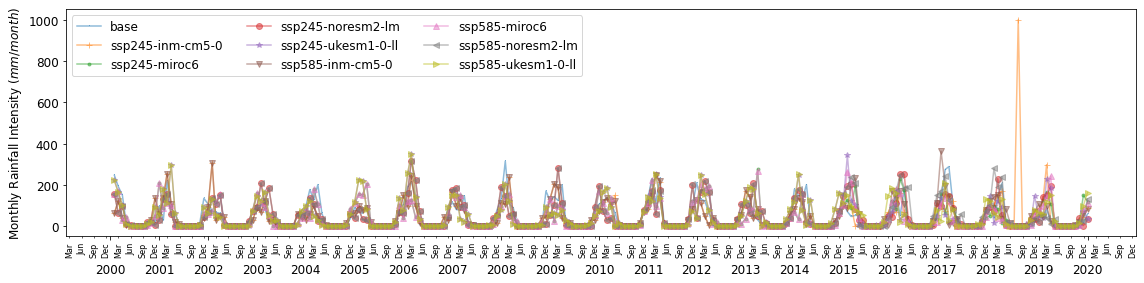

In [35]:
f, ax = plt.subplots(figsize=(16, 4))
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',))
for i in range(len(msdf.columns)):
    ax.plot(msdf.index, msdf.iloc[:, i], marker = next(marker), label=msdf.columns[i], alpha=0.5)
ax.tick_params(axis='both', labelsize=12)
ax.legend(ncol=3, fontsize=12, loc='upper left')
ax.set_ylabel('Monthly Rainfall Intensity $(mm/month)$', fontsize=12)


years = mdates.YearLocator()
months = mdates.MonthLocator(interval=3)
monthsFmt = mdates.DateFormatter('%b') 
yearsFmt = mdates.DateFormatter('%Y')

# ax.xaxis.set_ticks_position('top')
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), fontsize=8, rotation=90)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.tick_params(axis='x', pad=23) # add some space for the year label


f.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_m_240.png'), dpi=300, bbox_inches="tight")
plt.show()
# ax.plot(base_df.index, base_df, label='BASE')

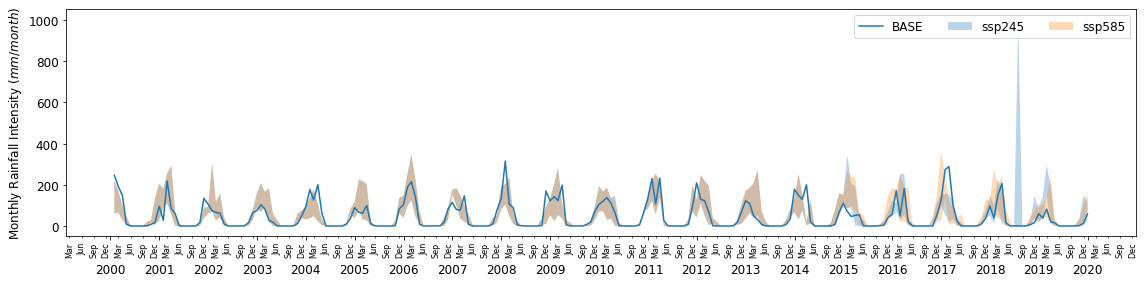

In [33]:
s245_min = msdf.iloc[:, 1:5].min(axis = 1)
s245_max = msdf.iloc[:, 1:5].max(axis = 1)
s585_min = msdf.iloc[:, 5:].min(axis = 1)
s585_max = msdf.iloc[:, 5:].max(axis = 1)

f, ax = plt.subplots(figsize=(16, 4))
ax.fill_between(msdf.index, s245_min, s245_max, alpha=0.3, label='ssp245')
ax.fill_between(msdf.index, s585_min, s585_max, alpha=0.3, label='ssp585')
ax.plot(msdf.index, msdf.iloc[:, 0], label='BASE')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('Monthly Rainfall Intensity $(mm/month)$', fontsize=12)
lines, labels = f.axes[0].get_legend_handles_labels()

ax.legend(
    lines, labels, ncol=3,
    # bbox_to_anchor=(0, 0.202),
    fontsize=12,
    # loc = 'lower left'
    )
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), fontsize=8, rotation=90)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.tick_params(axis='x', pad=23) # add some space for the year label

f.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_m_240_02.png'), dpi=300, bbox_inches="tight")
plt.show()

# Scatter plots

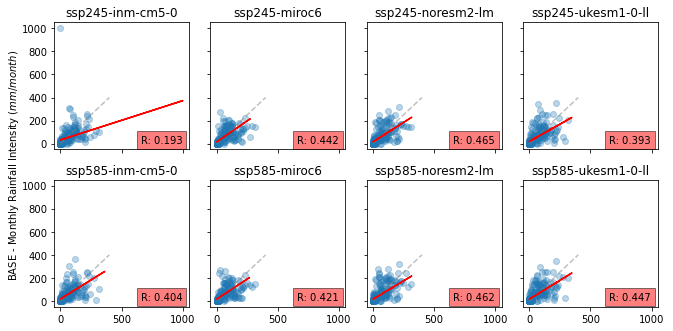

In [31]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5), sharex=True, sharey=True)
ax1 = fig.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
for ax, c in zip(axes.flat, msdf.columns[1:]):
    ax.plot([0, 400], [0, 400], '--', color='grey', alpha=0.5)
    ax.scatter(msdf.base, msdf[c], alpha=0.3)
    # x_val = msdf.base.tolist()
    # y_val = msdf[c].tolist()
    x_val = msdf[c].tolist()
    y_val = msdf.base.tolist()
    correlation_matrix = np.corrcoef(x_val, y_val)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2

    m, b = np.polyfit(x_val, y_val, 1)
    ax.plot(np.array(x_val), (m*np.array(x_val)) + b, 'r')

    # ax.set_ylabel('{}'.format('BASE'))
    # ax.set_xlabel('Scenario: {}'.format(c))
    ax.set_title('{}'.format(c))

    ax.text(
            0.95, 0.05,
            'R: {:.3f}'.format(r_squared),
            horizontalalignment='right',
            bbox=dict(facecolor='red', alpha=0.5),
            transform=ax.transAxes
            )
ax1.set_ylabel('{}'.format('BASE - Monthly Rainfall Intensity $(mm/month)$'), labelpad=10)
fig.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_m_scatter_240.png'), dpi=300, bbox_inches="tight")
plt.show()

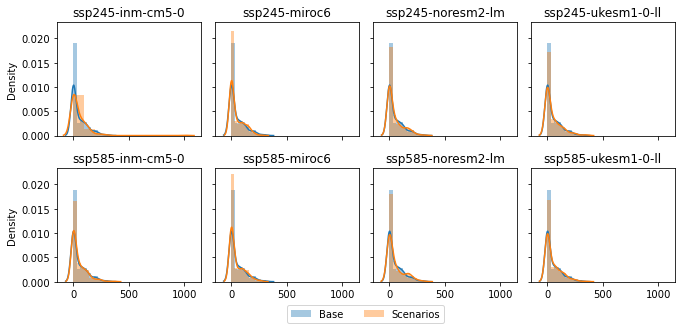

In [32]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5), sharex=True, sharey=True)
ax1 = fig.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
for ax, c in zip(axes.flat, msdf.columns[1:]):
    sns.distplot(msdf.base,  label="Base", bins=10, ax=ax, kde=True).set(xlabel=None)
    sns.distplot(msdf[c], label=c, bins=10, ax=ax, kde=True).set(xlabel=None)
    ax.set_title(c)
    # ax.legend()


lines, labels = fig.axes[0].get_legend_handles_labels()
ax1.legend(
    lines, ['Base', 'Scenarios'], loc = 'upper center', ncol=2,
    bbox_to_anchor=(0.5, -0.07),
    # fontsize=12
    )
fig.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_m_dis_240.png'), dpi=300, bbox_inches="tight")
plt.show()

# Annual Rainfall

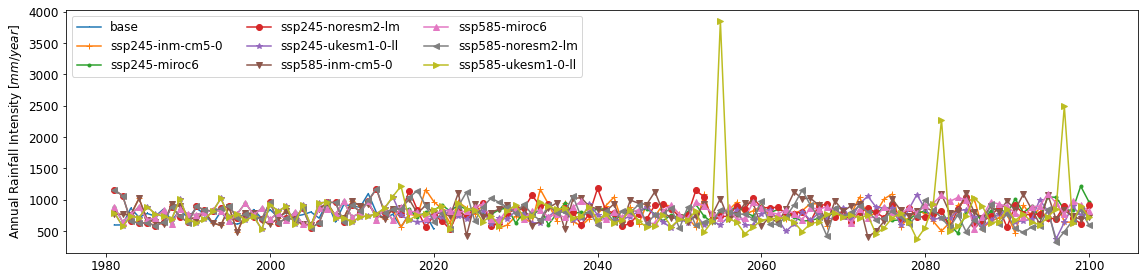

In [66]:
f, ax = plt.subplots(figsize=(16, 4))
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',))
for i in range(len(asdf.columns)):
    ax.plot(asdf.index, asdf.iloc[:, i], marker = next(marker), label=asdf.columns[i])
ax.tick_params(axis='both', labelsize=12)
ax.legend(ncol=3, fontsize=12, loc='upper left')
ax.set_ylabel('Annual Rainfall Intensity $[mm/year]$', fontsize=12)
f.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_a_01.png'), dpi=300, bbox_inches="tight")
plt.show()
# ax.plot(base_df.index, base_df, label='BASE')

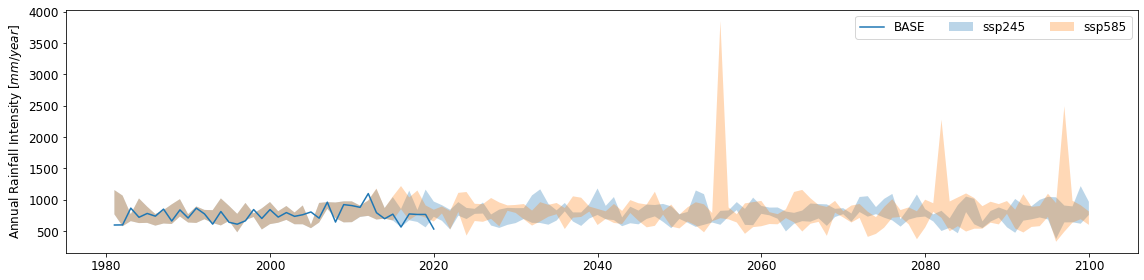

In [80]:
s245_min = asscn.iloc[:, :4].min(axis = 1)
s245_max = asscn.iloc[:, :4].max(axis = 1)
s585_min = asscn.iloc[:, 4:].min(axis = 1)
s585_max = asscn.iloc[:, 4:].max(axis = 1)

f, ax = plt.subplots(figsize=(16, 4))
ax.fill_between(asscn.index, s245_min, s245_max, alpha=0.3, label='ssp245')
ax.fill_between(asscn.index, s585_min, s585_max, alpha=0.3, label='ssp585')
ax.plot(as_base.index, as_base, label='BASE')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('Annual Rainfall Intensity $[mm/year]$', fontsize=12)
lines, labels = f.axes[0].get_legend_handles_labels()
f.tight_layout()
ax.legend(
    lines, labels, ncol=3,
    # bbox_to_anchor=(0, 0.202),
    fontsize=12,
    # loc = 'lower left'
    )
plt.savefig(os.path.join(working_path, 'okvg_gcms_a_02.png'), dpi=300, bbox_inches="tight")
plt.show()


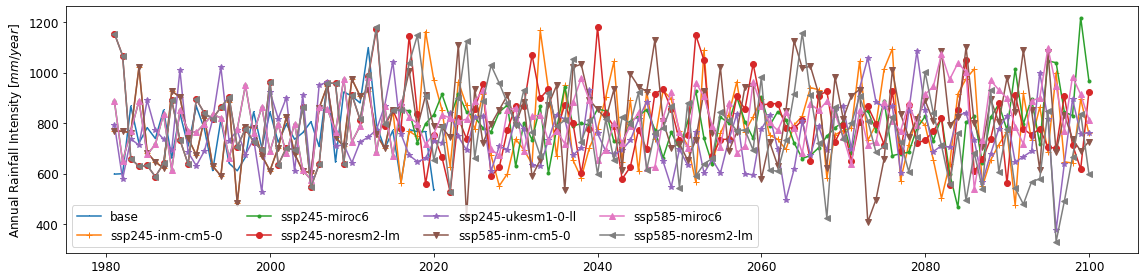

In [100]:
f, ax = plt.subplots(figsize=(16, 4))
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',))
for i in range(len(asdf.columns[:-1])):
    ax.plot(asdf.index, asdf.iloc[:, i], marker = next(marker), label=asdf.columns[i])
ax.legend(ncol=4, fontsize=12)
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('Annual Rainfall Intensity $[mm/year]$', fontsize=12)
f.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_a_03.png'), dpi=300, bbox_inches="tight")
plt.show()

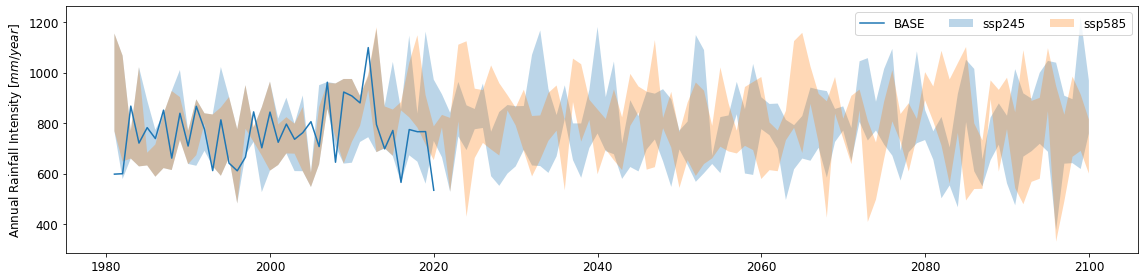

In [101]:
s245_min = asscn.iloc[:, :4].min(axis = 1)
s245_max = asscn.iloc[:, :4].max(axis = 1)
s585_min = asscn.iloc[:, 4:-1].min(axis = 1)
s585_max = asscn.iloc[:, 4:-1].max(axis = 1)

f, ax = plt.subplots(figsize=(16, 4))
ax.fill_between(asscn.index, s245_min, s245_max, alpha=0.3, label='ssp245')
ax.fill_between(asscn.index, s585_min, s585_max, alpha=0.3, label='ssp585')
ax.plot(as_base.index, as_base, label='BASE')
ax.tick_params(axis='both', labelsize=12)
lines, labels = f.axes[0].get_legend_handles_labels()
ax.set_ylabel('Annual Rainfall Intensity $[mm/year]$', fontsize=12)
ax.legend(
    lines, labels, ncol=3,
    # bbox_to_anchor=(0, 0.202),
    fontsize=12,
    # loc = 'lower left'
    )
f.tight_layout()

plt.savefig(os.path.join(working_path, 'okvg_gcms_a_04.png'), dpi=300, bbox_inches="tight")
plt.show()

# Montly Rainfall Intensity

In [82]:
s245_min = msdff.iloc[:, 1:5].min(axis = 1)
s245_max = msdff.iloc[:, 1:5].max(axis = 1)
s585_min = msdff.iloc[:, 5:].min(axis = 1)
s585_max = msdff.iloc[:, 5:].max(axis = 1)

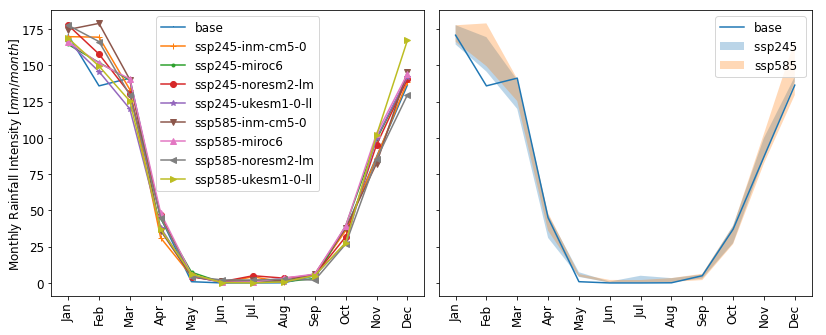

In [83]:
#%% plot month
# 
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',)) 

f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

# axes[0].plot(mon_df.index, mon_df, marker=[',', '+', '.', 'o', '*'])
for i in range(len(msdff.columns)):
    axes[0].plot(msdff.index, msdff.iloc[:, i], marker = next(marker))

# month_names = ['Jan','Feb','Mar','Apr','May','Jun',
#                'Jul','Aug','Sep','Oct','Nov','Dec']
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']

axes[1].plot(msdff.index, msdff.iloc[:, 0], label='base')
# ax.fill_between(base_dff.index, 0, base_dff.sub_137, alpha=0.3)
axes[1].fill_between(msdff.index, s245_min, s245_max, alpha=0.3, label='ssp245 ')
axes[1].fill_between(msdff.index, s585_min, s585_max, alpha=0.3, label='ssp585')
for ax in axes:
    ax.set_xticklabels(month_names, rotation=90,)
    ax.set_xticks(msdff.index[::1])
    ax.tick_params(axis='both', labelsize=12)
axes[0].legend(msdff.columns.tolist(), fontsize=12)
axes[1].legend(fontsize=12)

ax1.set_ylabel('Monthly Rainfall Intensity $[mm/month]$', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_mon_02.png'), dpi=300, bbox_inches="tight")
plt.show()


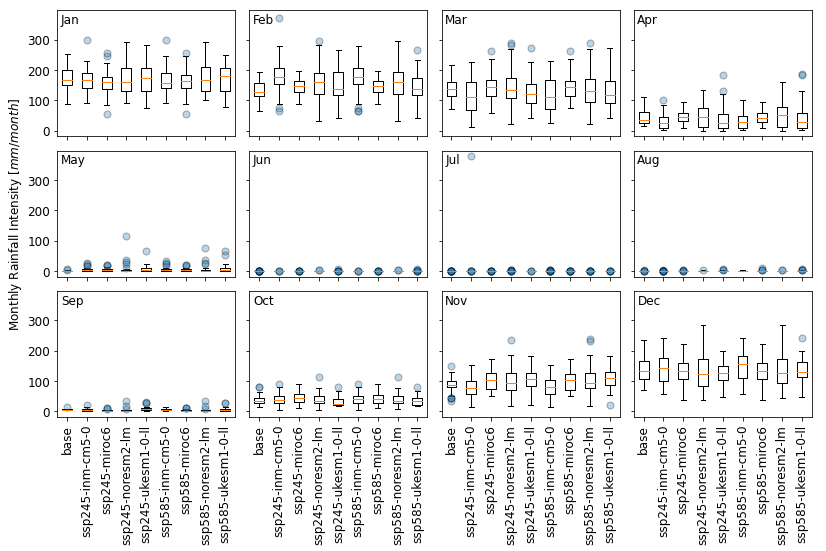

In [96]:
# Boxplot
f, axes = plt.subplots(3, 4, figsize=(12,8), sharex=True, sharey=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']


# plot. Set color of marker edge
flierprops = dict(
                marker='o', markerfacecolor='#1f77b4', markersize=7,
                # linestyle='None',
                # markeredgecolor='none',
                alpha=0.3)
for i, ax in enumerate(axes.flat):
    df_m = msdf.loc[msdf.index.month==i+1]
    df_m = df_m.dropna()
    ax.boxplot(df_m.values, flierprops=flierprops)
    ax.set_xticks([i+1 for i in range(9)])
    ax.set_xticklabels(df_m.keys(), rotation=90)
    # ax.set_xticks(df_m.columns[::1])
    ax.set_title(
        month_names[i],
        horizontalalignment='left',
        x=0.02,
        y=0.85,
    )
    ax.tick_params(axis='both', labelsize=12)
ax1.set_ylabel('Monthly Rainfall Intensity $[mm/month]$', fontsize=12, labelpad=10)
plt.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_mon03.png'), dpi=300, bbox_inches="tight")
plt.show()


In [91]:
msdf

base  ssp245-inm-cm5-0  ssp245-miroc6  ssp245-noresm2-lm  \
1980-01-31  117.431128        153.814008     111.334630         293.529961   
1980-02-29  142.622179        164.836576     152.382490         211.886381   
1980-03-31  133.387549        206.578210     205.729961         267.914008   
1980-04-30   23.747082         44.140467      30.032685         100.666926   
1980-05-31    2.537354          4.506226       4.039689           4.143969   
...                ...               ...            ...                ...   
2099-08-31         NaN          0.866537       0.089105           1.445525   
2099-09-30         NaN          5.706615       3.712451           0.436965   
2099-10-31         NaN         44.812451      95.442023          32.108171   
2099-11-30         NaN         56.116342     170.122957         160.185214   
2099-12-31         NaN        137.887160     110.436965         250.115953   

            ssp245-ukesm1-0-ll  ssp585-inm-cm5-0  ssp585-miroc6  \
1980-01-31          124.451751        153.812840     111.336965   
1980-02-29          119.040078        164.835798     152.382879   
1980-03-31          175.254475        206.577043     205.730350   
1980-04-30           47.117510         44.138521      30.032296   
1980-05-31            0.208171          4.506615       4.039689   
...                        ...               ...            ...   
2099-08-31            0.132685          0.700389       1.316342   
2099-09-30            0.288327          8.073930       7.757977   
2099-10-31           15.686381         20.656809      25.029961   
2099-11-30           86.002335         62.136187     106.856809   
2099-12-31          162.665370        162.930350     154.307393   

            ssp585-noresm2-lm  ssp585-ukesm1-0-ll  
1980-01-31         293.530739          124.443580  
1980-02-29         211.884047          119.031518  
1980-03-31         267.912840          175.256420  
1980-04-30         100.673541           47.118677  
1980-05-31           4.154086            0.212062  
...                       ...                 ...  
2099-08-31           2.996887            0.080156  
2099-09-30           2.237743            4.608949  
2099-10-31          27.909339           17.241634  
2099-11-30          15.560700          107.044358  
2099-12-31          18.522179          119.243191  

[1440 rows x 9 columns]

# Temperature

In [21]:
dff_max = pd.DataFrame()
dff_min = pd.DataFrame()
for i, name in zip(full_paths, wt_fds):
    df_max, df_min = gcm_analysis.read_tmp(os.path.join(i, 'Tmp1.Tmp'), 154)
    df_max = df_max.mean(axis=1)
    df_min = df_min.mean(axis=1)    
    df_max.name = '{}'.format(name)
    df_min.name = '{}'.format(name)    
    dff_max = pd.concat([dff_max, df_max], axis=1)
    dff_min = pd.concat([dff_min, df_min], axis=1)


100%|██████████| 154/154 [00:08<00:00, 17.50it/s]


In [22]:
dff_max.index = pd.DatetimeIndex(dff_max.index).normalize()
dff_min.index = pd.DatetimeIndex(dff_min.index).normalize()

In [23]:
dff_mean = pd.concat([dff_max, dff_min]).groupby(level=0).mean()

In [24]:
mtmp_max = dff_max.groupby(dff_max.index.month).mean()
mtmp_min = dff_min.groupby(dff_min.index.month).mean()
mtmp_avg = dff_mean.groupby(dff_mean.index.month).mean()



In [26]:
mtmp_max

ssp245-inm-cm5-0  ssp245-miroc6  ssp245-noresm2-lm  ssp245-ukesm1-0-ll  \
1          30.386313      30.702290          30.934727           31.992203   
2          30.196953      30.706507          30.641269           32.001481   
3          30.504288      30.227405          30.898590           31.863423   
4          30.441861      30.546205          31.276772           31.708937   
5          28.927230      29.534454          29.639054           30.720002   
6          26.916315      27.643973          28.162133           29.098714   
7          27.600560      28.296067          28.041658           29.192932   
8          31.453729      31.861139          31.733161           32.532591   
9          36.404342      36.415013          35.639558           37.081762   
10         36.801913      36.992574          37.560595           39.016291   
11         34.154847      34.394870          35.032391           35.525497   
12         32.097041      32.303941          32.727677           33.076946   

    ssp585-inm-cm5-0  ssp585-miroc6  ssp585-noresm2-lm  ssp585-ukesm1-0-ll  
1          30.764320      31.587785          31.566252           32.903875  
2          30.509958      31.519755          31.209166           33.237212  
3          30.888438      30.980034          31.731288           33.216543  
4          30.834288      31.243723          32.049479           33.279888  
5          29.142476      30.290360          30.536416           31.883716  
6          27.205810      28.430056          29.093276           30.300072  
7          28.156819      28.934901          29.023828           30.281141  
8          32.151427      32.579804          32.268194           33.503556  
9          37.061809      37.352527          36.129754           37.921952  
10         37.218258      37.746684          38.304986           39.876170  
11         34.943530      34.933450          36.057821           36.352389  
12         32.478490      33.049296          33.637673           34.302365

In [27]:
mt245_min = mtmp_min.iloc[:, :4].min(axis = 1)
mt245_max = mtmp_max.iloc[:, :4].max(axis = 1)
mt585_min = mtmp_min.iloc[:, 4:].min(axis = 1)
mt585_max = mtmp_max.iloc[:, 4:].max(axis = 1)

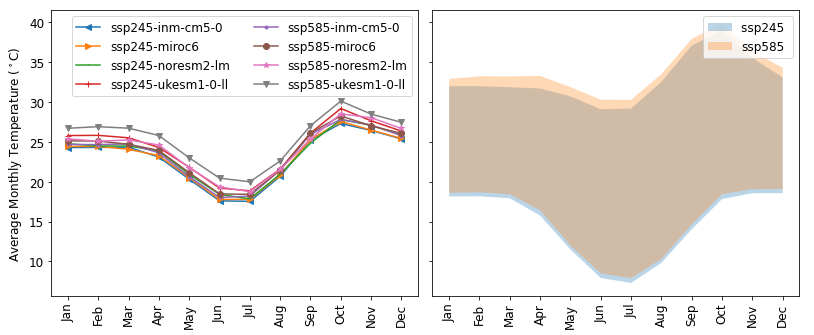

In [77]:
f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

for i in range(len(mtmp_max.columns)):
    axes[0].plot(mtmp_avg.index, mtmp_avg.iloc[:, i], marker = next(marker))
axes[1].fill_between(mtmp_max.index, mt245_min, mt245_max, alpha=0.3, label='ssp245 ')
axes[1].fill_between(mtmp_max.index, mt585_min, mt585_max, alpha=0.3, label='ssp585')

for ax in axes:
    ax.set_xticklabels(month_names, rotation=90)
    ax.set_xticks(mtmp_max.index[::1])
    ax.tick_params(axis='both', labelsize=12)
axes[0].legend(mtmp_max.columns.tolist(), ncol=2, fontsize=12)
axes[1].legend(fontsize=12)

ax1.set_ylabel('Average Monthly Temperature ($^\circ$C)', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_mon_temp_01.png'), dpi=300, bbox_inches="tight")
plt.show()

In [31]:
adf_min = dff_min.resample('A').mean()
adf_max = dff_max.resample('A').mean()
adf_mean = dff_mean.resample('A').mean()
adf_mean

ssp245-inm-cm5-0  ssp245-miroc6  ssp245-noresm2-lm  \
1980-12-31         22.145141      21.238351          21.398820   
1981-12-31         22.148459      21.160141          21.551271   
1982-12-31         21.379184      22.206126          22.050765   
1983-12-31         21.154009      21.986356          22.742641   
1984-12-31         21.712542      22.892556          21.493276   
...                      ...            ...                ...   
2095-12-31         23.525711      23.234795          25.830238   
2096-12-31         24.483198      23.981097          24.688695   
2097-12-31         24.728181      24.028321          24.194668   
2098-12-31         23.350308      24.396236          25.649934   
2099-12-31         24.174761      24.224842          24.322902   

            ssp245-ukesm1-0-ll  ssp585-inm-cm5-0  ssp585-miroc6  \
1980-12-31           20.928191         22.145141      21.238351   
1981-12-31           22.209300         22.148459      21.160141   
1982-12-31           22.362528         21.379184      22.206126   
1983-12-31           22.540915         21.154009      21.986356   
1984-12-31           21.242904         21.712542      22.892556   
...                        ...               ...            ...   
2095-12-31           28.991511         26.024813      27.006871   
2096-12-31           28.434428         25.680742      26.460351   
2097-12-31           26.921753         25.354937      26.192403   
2098-12-31           26.517227         27.214153      27.462861   
2099-12-31           27.077150         26.442045      26.998484   

            ssp585-noresm2-lm  ssp585-ukesm1-0-ll  
1980-12-31          21.398820           20.928191  
1981-12-31          21.551271           22.209300  
1982-12-31          22.050765           22.362528  
1983-12-31          22.742641           22.540915  
1984-12-31          21.493276           21.242904  
...                       ...                 ...  
2095-12-31          29.468814           30.680833  
2096-12-31          28.342710           31.538681  
2097-12-31          27.912250           32.221335  
2098-12-31          27.859856           32.319269  
2099-12-31          27.153563           30.812379  

[120 rows x 8 columns]

In [32]:
t245_min = adf_min.iloc[:, :4].min(axis = 1)
t245_max = adf_max.iloc[:, :4].max(axis = 1)
t585_min = adf_min.iloc[:, 4:].min(axis = 1)
t585_max = adf_max.iloc[:, 4:].max(axis = 1)

In [33]:
t245_max

1980-12-31    30.445508
1981-12-31    30.631112
1982-12-31    31.089219
1983-12-31    31.386255
1984-12-31    31.722573
                ...    
2095-12-31    38.302080
2096-12-31    37.394663
2097-12-31    35.302211
2098-12-31    34.692277
2099-12-31    35.779870
Freq: A-DEC, Length: 120, dtype: float64

In [39]:
mtmp = dff_mean.loc[dff_mean.index.month==0+1]
mtmp

ssp245-inm-cm5-0  ssp245-miroc6  ssp245-noresm2-lm  \
1980-01-01         26.542857      22.887013          19.920455   
1980-01-02         26.613961      25.047403          20.334091   
1980-01-03         26.303896      25.076299          20.507468   
1980-01-04         25.650974      25.912662          19.909091   
1980-01-05         24.828571      25.140909          20.771104   
...                      ...            ...                ...   
2099-01-27         25.133766      28.566883          25.543182   
2099-01-28         24.502273      29.539610          24.986688   
2099-01-29         23.804545      28.251623          25.907143   
2099-01-30         22.798701      25.147078          25.704870   
2099-01-31         23.353247      21.757143          25.920455   

            ssp245-ukesm1-0-ll  ssp585-inm-cm5-0  ssp585-miroc6  \
1980-01-01           23.603896         26.542857      22.887013   
1980-01-02           23.534416         26.613961      25.047403   
1980-01-03           23.600974         26.303896      25.076299   
1980-01-04           24.197727         25.650974      25.912662   
1980-01-05           24.434740         24.828571      25.140909   
...                        ...               ...            ...   
2099-01-27           28.714610         29.471429      27.199675   
2099-01-28           27.753571         29.959740      26.781818   
2099-01-29           27.102922         27.370779      28.162662   
2099-01-30           25.565584         26.381169      28.530844   
2099-01-31           26.722078         24.555195      29.892857   

            ssp585-noresm2-lm  ssp585-ukesm1-0-ll  
1980-01-01          19.920455           23.603896  
1980-01-02          20.334091           23.534416  
1980-01-03          20.507468           23.600974  
1980-01-04          19.909091           24.197727  
1980-01-05          20.771104           24.434740  
...                       ...                 ...  
2099-01-27          23.130195           31.925325  
2099-01-28          24.354870           30.839935  
2099-01-29          24.266883           31.097727  
2099-01-30          24.645455           30.983442  
2099-01-31          25.921429           30.672078  

[3720 rows x 8 columns]

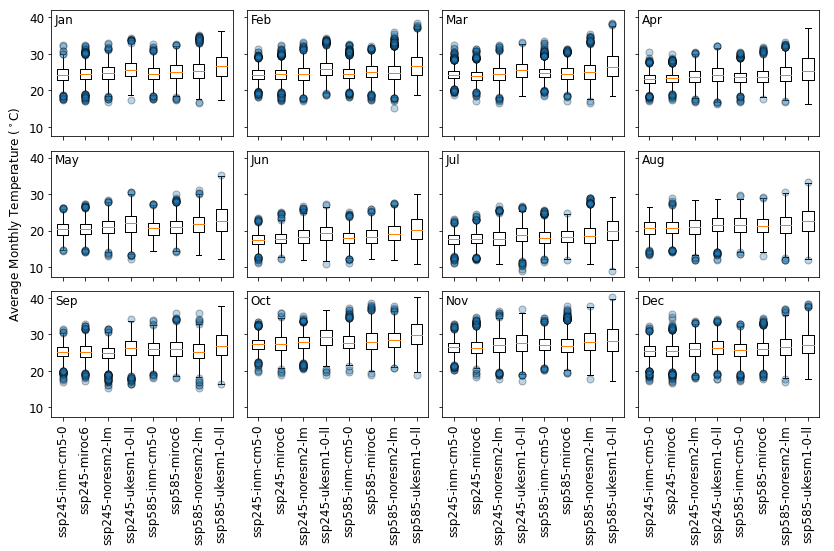

In [97]:
# Boxplot
f, axes = plt.subplots(3, 4, figsize=(12,8), sharex=True, sharey=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']


# plot. Set color of marker edge
flierprops = dict(
                marker='o', markerfacecolor='#1f77b4', markersize=7,
                # linestyle='None',
                # markeredgecolor='none',
                alpha=0.3)
for i, ax in enumerate(axes.flat):
    mtmp = dff_mean.loc[dff_mean.index.month==i+1]
    ax.boxplot(
        mtmp.values, flierprops=flierprops,
        #showfliers=False
        )
    ax.set_xticks([i+1 for i in range(8)])
    ax.set_xticklabels(mtmp.keys(), rotation=90)
    # ax.set_xticks(df_m.columns[::1])
    ax.set_title(
        month_names[i],
        horizontalalignment='left',
        x=0.02,
        y=0.85,
        )
    
    ax.tick_params(axis='both', labelsize=12)
ax1.set_ylabel('Average Monthly Temperature ($^\circ$C)', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_mon_temp.png'), dpi=300, bbox_inches="tight")
plt.show()

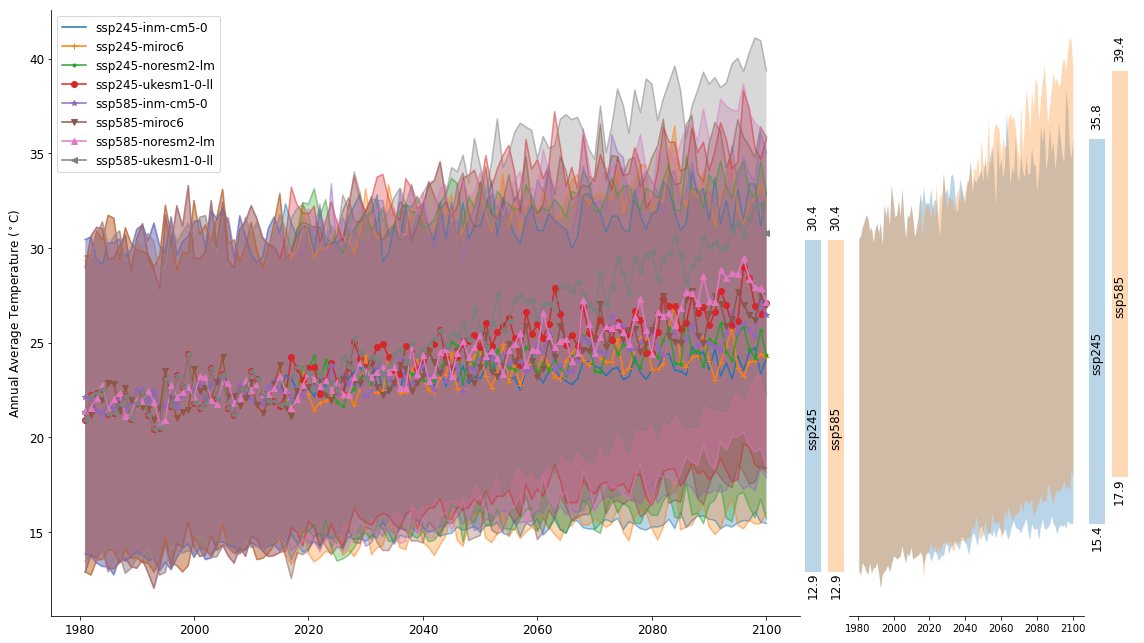

In [237]:
f, axes = plt.subplots(
    1, 4, figsize=(16, 9), sharey=True,
    gridspec_kw={
                'width_ratios': [0.7, 0.04, 0.22, 0.04],
                'wspace': 0.01
                })

ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

axes[1].tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axes[1].axis('off')

# axes[1].axis('off')
axes[3].tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axes[3].axis('off')

ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i in range(len(adf_mean.columns)):
    axes[0].plot(adf_mean.index, adf_mean.iloc[:, i], marker = next(marker), label=adf_mean.columns[i])
    axes[0].plot(adf_mean.index, adf_min.iloc[:, i], color=colors[i], alpha=0.5)
    axes[0].fill_between(adf_mean.index, adf_min.iloc[:, i], adf_max.iloc[:, i], alpha=0.3)
    axes[0].plot(adf_mean.index, adf_max.iloc[:, i], color=colors[i], alpha=0.5)
    # ax.fill_between(scn_df.index, s585_min, s585_max, alpha=0.3, label='ssp585')

axes[2].fill_between(adf_mean.index, t245_min, t245_max, alpha=0.3, label='ssp245 ')
axes[2].fill_between(adf_mean.index, t585_min, t585_max, alpha=0.3, label='ssp585')


axes[1].bar(
    0, t245_max['1980-12-31']-t245_min['1980-12-31'],
    width=0.7,
    bottom=t245_min['1980-12-31'], alpha=0.3)
axes[1].bar(
    1, t585_max['1980-12-31']-t585_min['1980-12-31'],
    width=0.7,
    bottom=t585_min['1980-12-31'], alpha=0.3)

axes[1].text(
    0, (t245_max['1980-12-31'] + t245_min['1980-12-31'])/2,
   'ssp245',
    rotation=90,
    va='top',
    ha='center',
    fontsize=12)
axes[1].text(
    1, (t585_min['1980-12-31']+t585_max['1980-12-31'])/2,
    'ssp585',
    rotation=90,
    va='top',
    ha='center',
    fontsize=12
    )

axes[1].text(
    0, t245_min['1980-12-31'],
    '{:.1f}'.format(t245_min['1980-12-31']),
    rotation=90,
    va='top',
    ha='center',
    fontsize=12)

axes[1].text(
    1, t585_min['1980-12-31'],
    '{:.1f}'.format(t585_min['1980-12-31']),    
    rotation=90,
    va='top',
    ha='center',
    fontsize=12
    )

axes[1].text(
    0, t245_max['1980-12-31']+0.5,
    '{:.1f}'.format(t245_max['1980-12-31']),
    rotation=90,
    va='bottom',
    ha='center',
    fontsize=12)

axes[1].text(
    1, t585_max['1980-12-31']+0.5,
    '{:.1f}'.format(t585_max['1980-12-31']),    
    rotation=90,
    va='bottom',
    ha='center',
    fontsize=12
    )

axes[3].bar(
    0, t245_max['2099-12-31']-t245_min['2099-12-31'],
    width=0.7,
    bottom=t245_min['2099-12-31'], alpha=0.3)
axes[3].bar(
    1, t585_max['2099-12-31']-t585_min['2099-12-31'],
    width=0.7,
    bottom=t585_min['2099-12-31'], alpha=0.3)

# ax1.add_patch(Rectangle((1.01, 0.2), 0.01, 0.95))

axes[0].tick_params(axis='both', labelsize=12)
axes[0].legend(loc='upper left', fontsize=12,)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

axes[2].spines['left'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].tick_params(top=False, left=False, right=False)

# axes[1].tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

axes[3].text(
    0, (t245_min['2099-12-31']+t245_max['2099-12-31'])/2,
    'ssp245', rotation=90,
    va='top',
    ha='center',
    fontsize=12)
axes[3].text(
    1, (t585_min['2099-12-31']+t585_max['2099-12-31'])/2,
    'ssp585', rotation=90,
    va='top',
    ha='center',
    fontsize=12
    )

axes[3].text(
    0, t245_min['2099-12-31'],
    '{:.1f}'.format(t245_min['2099-12-31']),
    rotation=90,
    va='top',
    ha='center',
    fontsize=12)
axes[3].text(
    0, t245_max['2099-12-31']+0.5,
    '{:.1f}'.format(t245_max['2099-12-31']),
    rotation=90,
    va='bottom',
    ha='center',
    fontsize=12)

axes[3].text(
    1, t585_min['2099-12-31'],
    '{:.1f}'.format(t585_min['2099-12-31']),
    rotation=90,
    va='top',
    ha='center',
    fontsize=12)

axes[3].text(
    1, t585_max['2099-12-31']+0.5,
    '{:.1f}'.format(t585_max['2099-12-31']),
    rotation=90,
    va='bottom',
    ha='center',
    fontsize=12)


ax1.set_ylabel('Annual Average Temperature ($^\circ$C)', fontsize=12)
# axes[1].legend()
# ax.set_yscale('log')
f.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_scn_tmp.png'), dpi=300, bbox_inches="tight")
plt.show()
# ax.plot(base_df.index, base_df, label='BASE')

In [71]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [ ]:


tot_df

#%%
abase_df = base_dff.resample('A').sum()
adf =dff.resample('A').sum()
atot_df = pd.concat([abase_df, adf], axis=1)
atot_df

#%% get month plot 
mon_df = tot_df.groupby(tot_df.index.month).mean()
mon_df

#%% get min max
gcsms_mon = mon_df.iloc[:, 1:]
s245_min = gcsms_mon.iloc[:, :4].min(axis = 1)
s245_max = gcsms_mon.iloc[:, :4].max(axis = 1)
s585_min = gcsms_mon.iloc[:, 4:].min(axis = 1)
s585_max = gcsms_mon.iloc[:, 4:].max(axis = 1)



#%% plot month
# 
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',)) 

f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axes[1].plot(mon_df.index, mon_df['base'], label='base')
# ax.fill_between(base_dff.index, 0, base_dff.sub_137, alpha=0.3)
axes[1].fill_between(mon_df.index, s245_min, s245_max, alpha=0.3, label='ssp245 ')
axes[1].fill_between(mon_df.index, s585_min, s585_max, alpha=0.3, label='ssp585')

# axes[0].plot(mon_df.index, mon_df, marker=[',', '+', '.', 'o', '*'])
for i in range(len(mon_df.columns)):
    axes[0].plot(mon_df.index, mon_df.iloc[:, i], marker = next(marker))
axes[0].legend(mon_df.columns.tolist())
axes[1].legend()
# month_names = ['Jan','Feb','Mar','Apr','May','Jun',
#                'Jul','Aug','Sep','Oct','Nov','Dec']
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']
for ax in axes:
    ax.set_xticklabels(month_names, rotation=90)
    ax.set_xticks(mon_df.index[::1])
ax1.set_ylabel('Monthly Rainfall Intensity $[mm/month]$')
plt.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_mon.png'), dpi=300, bbox_inches="tight")
plt.show()

#%%
# Boxplot
f, axes = plt.subplots(3, 4, figsize=(12,8), sharex=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']


# plot. Set color of marker edge
flierprops = dict(
                marker='o', markerfacecolor='#1f77b4', markersize=7,
                # linestyle='None',
                # markeredgecolor='none',
                alpha=0.3)
for i, ax in enumerate(axes.flat):
    df_m = tot_df.loc[tot_df.index.month==i+1]
    ax.boxplot(df_m.values, flierprops=flierprops)
    ax.set_xticks([i+1 for i in range(9)])
    ax.set_xticklabels(df_m.keys(), rotation=90)
    # ax.set_xticks(df_m.columns[::1])
    ax.set_title(
        month_names[i],
        horizontalalignment='left',
        x=0.02,
        y=0.85,
        )
ax1.set_ylabel('Monthly Rainfall Intensity $[mm/month]$')
plt.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_mon2.png'), dpi=300, bbox_inches="tight")
plt.show()

#%% get min max
agcm = atot_df.iloc[:, 1:]
s245_min = agcm.iloc[:, :4].min(axis = 1)
s245_max = agcm.iloc[:, :4].max(axis = 1)
s585_min = agcm.iloc[:, 4:].min(axis = 1)
s585_max = agcm.iloc[:, 4:].max(axis = 1)


ctot_df = atot_df['1/1/2000':'12/31/2019']

#%% plot month
# 
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',)) 

f, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axes[1].plot(atot_df.index, atot_df['base'], label='base')
# ax.fill_between(base_dff.index, 0, base_dff.sub_137, alpha=0.3)
axes[1].fill_between(atot_df.index, s245_min, s245_max, alpha=0.3, label='ssp245')
axes[1].fill_between(atot_df.index, s585_min, s585_max, alpha=0.3, label='ssp585')

# axes[0].plot(mon_df.index, mon_df, marker=[',', '+', '.', 'o', '*'])
for i in range(len(ctot_df.columns)):
    axes[0].plot(ctot_df.index, ctot_df.iloc[:, i], marker = next(marker))
axes[0].legend(atot_df.columns.tolist(), ncol=2)
axes[1].legend()

month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']
axes[0].margins( y=0.2)
ax1.set_ylabel('Annual Rainfall Intensity $[mm/year]$', labelpad=10)
plt.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_a.png'), dpi=300, bbox_inches="tight")
plt.show()


In [71]:
from swatmf_pkgs import swatmf_viz
import itertools